In [1]:
%matplotlib inline
from sklearn import svm
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

## 1. SVM (Linear Kernel)

In [2]:
data = './ex6/ex6data1.mat'
mat = scipy.io.loadmat(data)

X = mat['X']
y = mat['y']

pos = np.array([X[i] for i in range(0, len(X[:,0])) if y[i] == 1])
neg = np.array([X[i] for i in range(0, len(X[:,0])) if y[i] == 0])


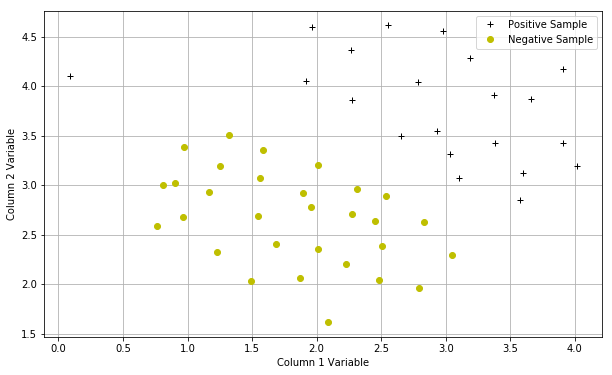

In [3]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()

In [4]:
def plotDataForLinearSVM(clf):
    
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x0 = np.linspace(0, 5)
    
    # hyperplane: w0*x0 + w1*x1 + b = 0
    # x1 = -(w0*x0 + b) / w1 
    x1 = -(w[0] * x0 + b) / w[1]
    
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)

    plt.plot(x0, x1, 'k-')


prediction: [0 1]


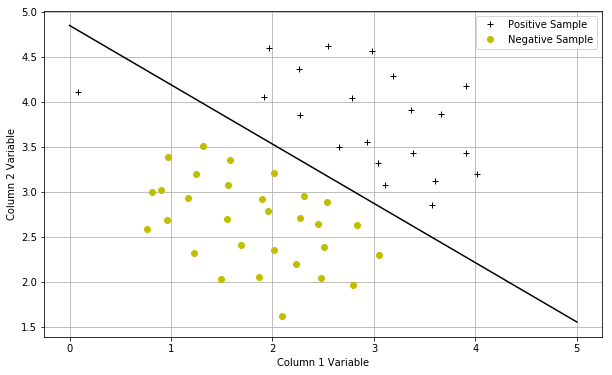

In [5]:
clf = svm.SVC(C=1, kernel='linear') # underfitting
clf.fit(X, y.flatten())

test_data = np.array([[2,1], [4,4]])
print("prediction: "+str(clf.predict(test_data)))

plotDataForLinearSVM(clf)

prediction: [0 1]


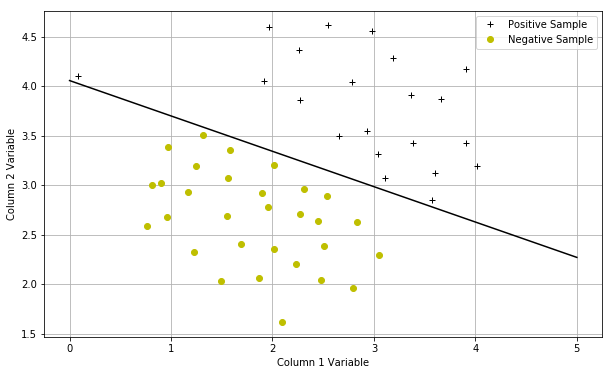

In [6]:
clf = svm.SVC(C=1000, kernel='linear') # overfitting
clf.fit(X, y.flatten())

test_data = np.array([[2,1], [4,4]])
print("prediction: "+str(clf.predict(test_data)))

plotDataForLinearSVM(clf)

## 2. SVM (Gaussian Kernel)

In [7]:
data = './ex6/ex6data2.mat'
mat = scipy.io.loadmat(data)

X = mat['X']
y = mat['y']

pos = np.array([X[i] for i in range(0, len(X[:,0])) if y[i] == 1])
neg = np.array([X[i] for i in range(0, len(X[:,0])) if y[i] == 0])

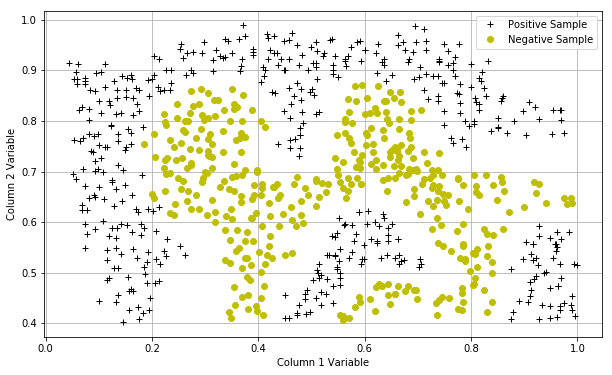

In [8]:
def plotData1():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData1()

In [9]:
def plotDataForNonLinearSVM(clf):
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    

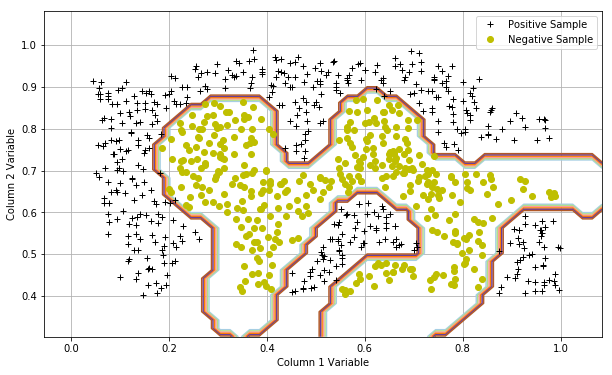

In [10]:
sigma = 0.1
gamma = np.power(sigma,-2.)
clf1 = svm.SVC(kernel = 'rbf', gamma=gamma, C=1)
clf1.fit(X, y.flatten())
plotDataForNonLinearSVM(clf1)